## Example (Shooting Method):

Solve the following 2nd order ordinary differential equation using the shooting method:

$$\frac{d^2f(x)}{dx^2} = \frac{df(x)}{dx} + 3$$

if the independent variable is over the domain of [0, 20], and we know the boundary values:

$f(0)  = 10$

$f(20) = 10^6$

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### Analytical Solution using sympy:

In [2]:
# Define symbols

f = sp.symbols("f", cls = sp.Function)

x = sp.symbols("x")

In [3]:
# ODE

diffeq = sp.Eq(f(x).diff(x,2) - f(x).diff(x,1) - 3, 0)

display(diffeq)

Eq(-Derivative(f(x), x) + Derivative(f(x), (x, 2)) - 3, 0)

In [4]:
# Solve the ODE:

result = sp.dsolve(diffeq, f(x), ics = {f(0):1.e1, f(20):1.e6})

display(result)

Eq(f(x), -3*x + 0.00206125668436825*exp(x) + 9.99793874331563)

In [9]:
# Step size:
h_1 = 0.1

# Initial conditions
f_00 = 1.e1
f_20 = 1.e6

# Define axis
x_1 = np.arange(0., 20. + h_1, h_1)

# Evaluate the sympy solution usinf x_1

f_x = []

for i in x_1:
    
    f_x.append(result.subs(x, i).args[1])
    
f_x = np.array(f_x)


#f_x = lambda x, s: -3*x + 0.00206125668436825*np.exp(x) + 9.99793874331563 # this is f(x)


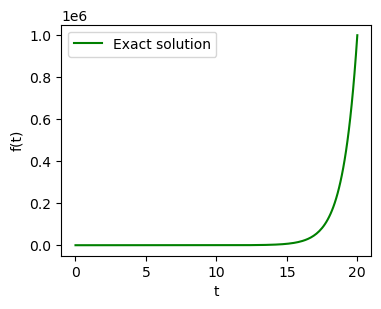

In [10]:
# Plot:

plt.figure(figsize = (4,3))

plt.plot(x_1, f_x, "g", label = "Exact solution")

plt.xlabel('t')
plt.ylabel('f(t)')

#plt.xlim(0,2.0)
#plt.ylim(0,1.1)

plt.legend()
plt.show()

### Shooting Method

$$\frac{d^2f(x)}{dx^2} = \frac{df(x)}{dx} + 3$$


Let's reduce this ODE to first order:

$$\Rightarrow  y=\frac{df}{dx}$$


$$\Rightarrow \frac{dy(x)}{dx} = y + 3$$


The resulting matrix looks like:




In [13]:
from scipy.integrate import solve_ivp

In [14]:
# 1st order ODE:

F = lambda x, s: np.dot(np.array([[0,1],[0,1 + 3/s[1]]]), s)

In [20]:
# Axis:
x_span = np.arange(0, 20 + h_1, h_1) # in x_1

# Guess:
v_00 = 1.e-1

#Solution:
sol = solve_ivp(F, [0, 20], [f_00, v_00], t_eval = x_span)

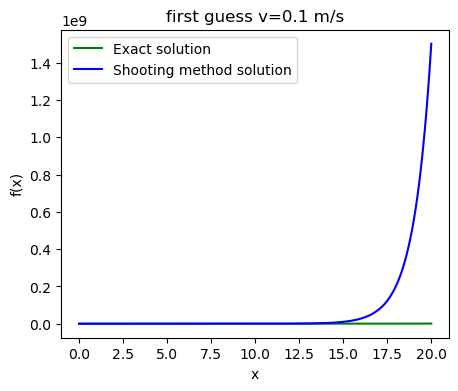

In [21]:
# Plotting

plt.figure(figsize = (5, 4))
plt.plot(x_1, f_x, "g", label = "Exact solution")
plt.plot(sol.t, sol.y[0], "b", label = "Shooting method solution")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'first guess v={v_00} m/s')

plt.legend()
plt.show()

### Root-finding problem:



In [26]:
from scipy.optimize import fsolve

In [27]:
def objective(v_00):
    
    sol = solve_ivp(F, [0, 20], [f_00, v_00], t_eval = x_span)
    
    f = sol.y[0]
    
    return f[-1] - f_20

In [28]:
# Optimisation:

new_v00, = fsolve(objective, 0.1)

print(new_v00)

-2.9977085936988135


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/integrate/_ivp/base.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y0 = np.asarray(y0)


### Shooting method:


In [29]:
# New solution using new_v00

new_sol = solve_ivp(F, [0, 20], [f_00, new_v00], t_eval = x_span)


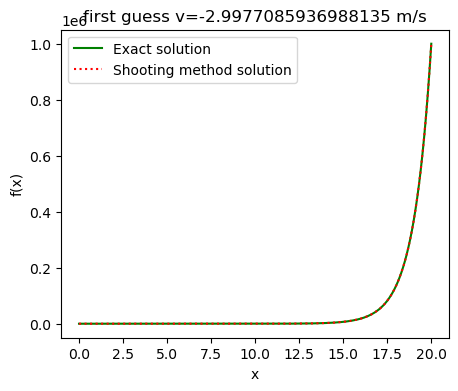

In [33]:
# Plotting:

# Plotting

plt.figure(figsize = (5, 4))
plt.plot(x_1, f_x, "g", label = "Exact solution")
plt.plot(new_sol.t, new_sol.y[0], "r", linestyle=":", label = "Shooting method solution")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'first guess v={new_v00} m/s')

plt.legend()
plt.show()

## Example (Finite Differences Method):

Solve the following 2nd order ordinary differential equation using the finite difference method:

$$\frac{d^2f(x)}{dx^2} = \frac{df(x)}{dx} + 3$$

if the independent variable is over the domain of [0, 20], and we know the boundary values:

$f(0)  = 10$

$f(20) = 10^6$

In [36]:
# Define n

n = 100

h  = (20 - 0)/n

print(h)

# Get A:

A = np.zeros((n+1, n+1))

A[0, 0] = 1
A[n, n] = 1


print(A)

0.2
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [38]:
# Fill in the diagonals

for i in range(1, n):
    
    A[i, i-1] = 2 + h
    A[i, i] = -4
    A[i, i+1] = 2 - h
    
print(A)

[[ 1.   0.   0.  ...  0.   0.   0. ]
 [ 2.2 -4.   1.8 ...  0.   0.   0. ]
 [ 0.   2.2 -4.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ... -4.   1.8  0. ]
 [ 0.   0.   0.  ...  2.2 -4.   1.8]
 [ 0.   0.   0.  ...  0.   0.   1. ]]


In [39]:
# Get b
b = np.zeros(n+1)

b[0]  = f_00
b[-1] = f_20

print(b)

[1.e+01 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 1.e+06]


In [40]:
# In between we use th RHS of the FD ODE

b[1:-1] = 6*h**2

print(b)

[1.0e+01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01
 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01
 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01
 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01
 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01
 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01
 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01
 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01
 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01
 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01
 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01 2.4e-01
 2.4e-01 1.0e+06]


In [41]:
# solve the linear equations

f = np.linalg.solve(A, b)

print(f)

[ 1.00000000e+01  9.40042834e+00  8.80095187e+00  8.20159174e+00
  7.60237381e+00  7.00332966e+00  6.40449793e+00  5.80592581e+00
  5.20767100e+00  4.60980402e+00  4.01241103e+00  3.41559738e+00
  2.81949180e+00  2.22425166e+00  1.63006926e+00  1.03717966e+00
  4.45870152e-01 -1.43508138e-01 -7.30526048e-01 -1.31465905e+00
 -1.89526605e+00 -2.47156350e+00 -3.04259371e+00 -3.60718619e+00
 -4.16391033e+00 -4.71101762e+00 -5.24637097e+00 -5.76735840e+00
 -6.27078748e+00 -6.75275635e+00 -7.20849609e+00 -7.63217799e+00
 -8.01667808e+00 -8.35328931e+00 -8.63136971e+00 -8.83791241e+00
 -8.95702016e+00 -8.96926296e+00 -8.85089306e+00 -8.57288539e+00
 -8.09976492e+00 -7.38817322e+00 -6.38511670e+00 -5.02582541e+00
 -3.23113604e+00 -9.04293486e-01  2.07295853e+00  5.84515543e+00
  1.05889516e+01  1.65202581e+01  2.39029661e+01  3.30596091e+01
  4.43843950e+01  5.83591333e+01  7.55727024e+01  9.67448424e+01
  1.22755236e+02  1.54679050e+02  1.93830378e+02  2.41815335e+02
  3.00596949e+02  3.72574

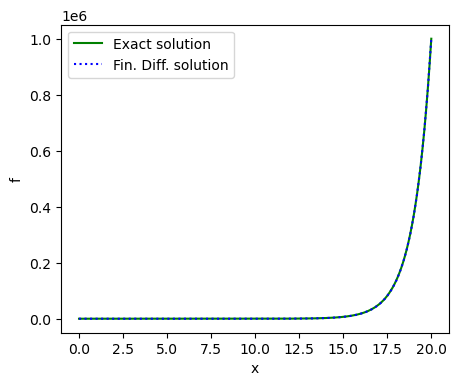

In [42]:
#Plotting

t = np.linspace(0, 20, n+1)

plt.figure(figsize=(5, 4))
plt.plot(x_1, f_x, "g", label = "Exact solution")
plt.plot(t, f, "b", linestyle = ":", label = "Fin. Diff. solution" )

plt.xlabel('x')
plt.ylabel('f')

plt.legend()
plt.show()